# Metoda przerzedzania

Napisz algorytm, który dla ustalonej niejednorodnej funkcji intensywności $\lambda(t)$ generuje czasy oczekiwania niejednorodnego procesu Poissona metodą przerzedzania.

Sprawdź poprawność jego działania weryfikując, że $N_t$~Poiss$(\int^t_0\lambda(s)ds)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import typing

In [2]:
def thinning(lam_t: typing.Callable, lam: float, T: int) -> [int, np.array]:
    """Funkcja generująca niejednorodny proces Poissona metodą rozrzedzania.
    Input:
        lam_t (function) - funkcja intensywności,
        lam (int) - stała intensywności,
        T (int) - kompozyt czasowy.
    Output:
        I (int) - liczba skoków N(t) na [0, T],
        S (np.array) -  momenty skoków."""
    t = 0
    I = 0
    S = [0]
    while t <= T:
        t -= np.log(np.random.uniform(0, 1)) / lam
        U2 = np.random.uniform(0, 1)
        if U2 <= lam_t(t) / lam:
            I += 1
            S = np.append(S, t)
    return I, S


def lam_t(t: int) -> int:
    """Funkcja intensywności dla niejednorodnego procesu Poissona zwracająca λ(t)=t."""
    return t

In [3]:
T = 10
lam = lam_t(T)
rozrzedzanie = thinning(lam_t, lam, T)[1]

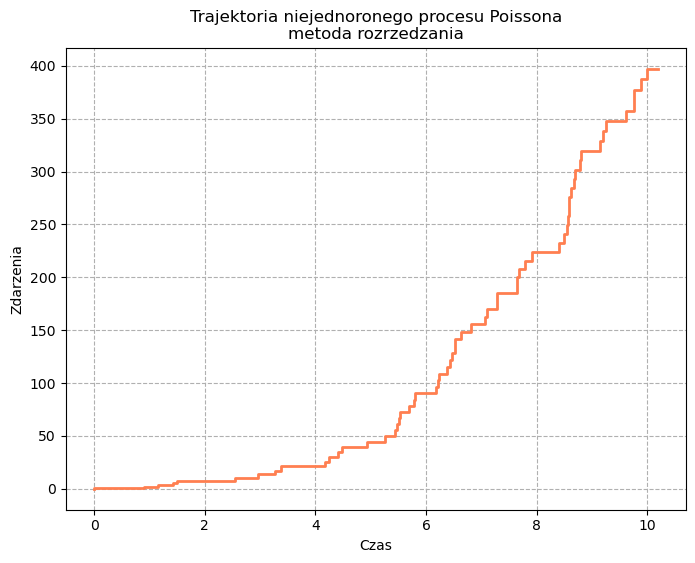

In [4]:
plt.figure(figsize=(8, 6))
plt.step(rozrzedzanie, np.cumsum(rozrzedzanie), color="coral", lw=2)
plt.xlabel("Czas")
plt.ylabel("Zdarzenia")
plt.title("Trajektoria niejednoronego procesu Poissona\nmetoda rozrzedzania")
plt.grid(linestyle="--")
plt.show()

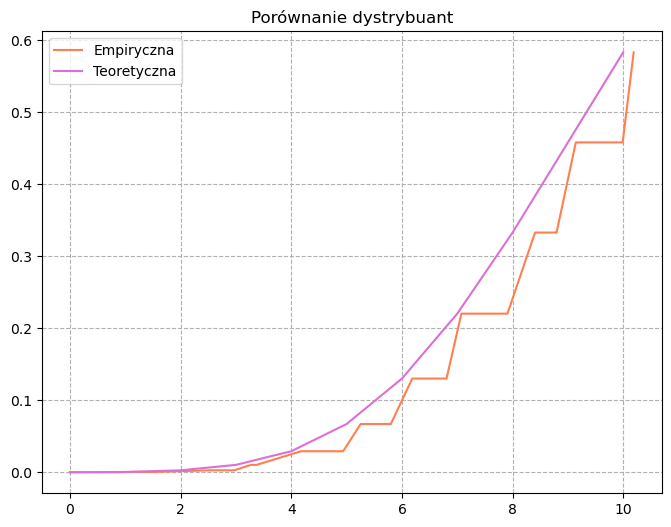

In [5]:
t = np.arange(0, T + 1)
plt.figure(figsize=(8, 6))
plt.plot(
    rozrzedzanie,
    scipy.stats.poisson.cdf(rozrzedzanie, lam),
    label="Empiryczna",
    color="coral",
)
plt.plot(t, scipy.stats.poisson.cdf(t, lam), label="Teoretyczna", color="orchid")
plt.legend()
plt.title("Porównanie dystrybuant")
plt.grid(linestyle="--")
plt.show()

E(N(t))=m(t) - policzyc wartosci oczekiwane np dla ostatniego skoku (dla wielu realizacji skoków) i wtedy to bedzie sie rownalo tej całce
- $\Bbb{E}[N(t)]=\int^t_0\lambda(s)ds$

In [6]:
calka_scipy = scipy.integrate.quad(func=lam_t, a=0, b=T)[0]

expected = np.zeros(100)
keyT = np.zeros(100)

for i in range(100):
    for j in range(100):
        keyT[j] = thinning(lam_t, lam, T)[0]
    expected[i] = np.mean(keyT)

print(
    "W tym przypadku całka z funkcji intensywności równa jest",
    calka_scipy,
    "\nWartośc oczekiwana liczby zdarzeń równa jest ",
    np.mean(expected),
)

W tym przypadku całka z funkcji intensywności równa jest 50.0 
Wartośc oczekiwana liczby zdarzeń równa jest  51.0119


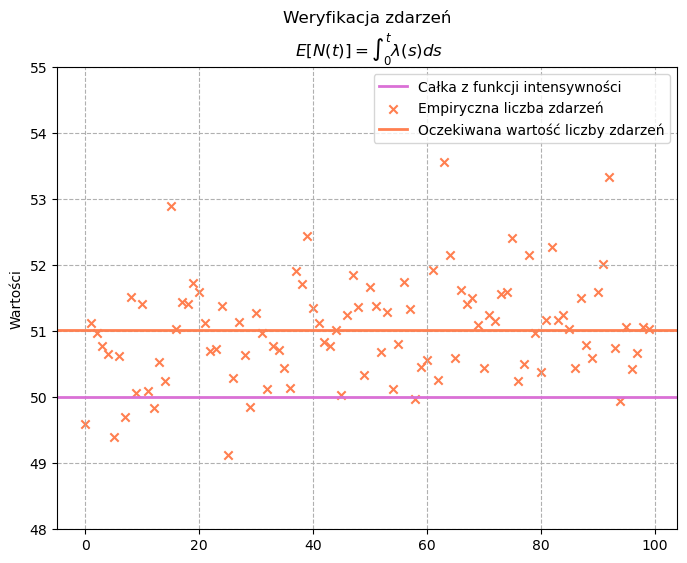

In [8]:
plt.figure(figsize=(8, 6))
plt.axhline(y=calka_scipy, label="Całka z funkcji intensywności", color="orchid", lw=2)
plt.scatter(
    range(0, len(expected)),
    expected,
    label="Empiryczna liczba zdarzeń",
    color="coral",
    marker="x",
)
plt.axhline(
    y=np.mean(expected), label="Oczekiwana wartość liczby zdarzeń", color="coral", lw=2
)
plt.legend()
plt.title("Weryfikacja zdarzeń\n $E[N(t)]=\int^t_0\lambda(s)ds$ ")
plt.ylabel("Wartości")
plt.grid(linestyle="--")
plt.ylim(calka_scipy - 2, calka_scipy + 5)
plt.show()